## E-Commerce: Linear Regression

### Annual customer's spend prediction model


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("data/ecommerce.xlsx")

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


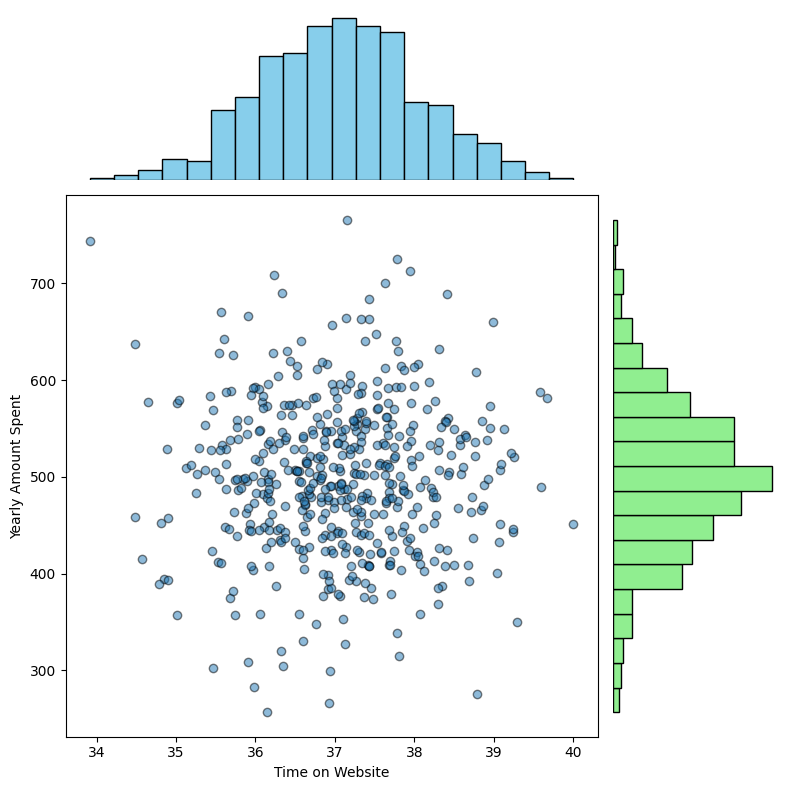

In [6]:
import matplotlib.gridspec as gridspec

x = df["Time on Website"]
y = df["Yearly Amount Spent"]

fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(4, 4)

ax_scatter = fig.add_subplot(gs[1:4, 0:3])
ax_scatter.scatter(x, y, alpha=0.5, edgecolor="k")
ax_scatter.set_xlabel("Time on Website")
ax_scatter.set_ylabel("Yearly Amount Spent")

ax_histx = fig.add_subplot(gs[0, 0:3], sharex=ax_scatter)
ax_histx.hist(x, bins=20, color="skyblue", edgecolor="k")
ax_histx.axis("off")

ax_histy = fig.add_subplot(gs[1:4, 3], sharey=ax_scatter)
ax_histy.hist(y, bins=20, orientation="horizontal", color="lightgreen", edgecolor="k")
ax_histy.axis("off")

plt.tight_layout()
plt.show()

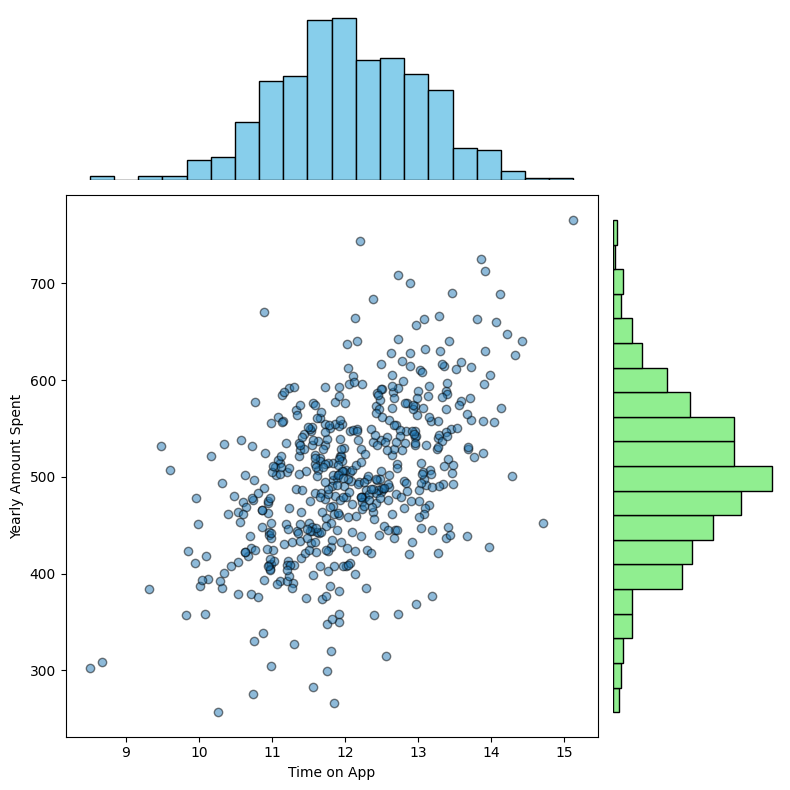

In [7]:
x = df["Time on App"]
y = df["Yearly Amount Spent"]

fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(4, 4)

ax_scatter = fig.add_subplot(gs[1:4, 0:3])
ax_scatter.scatter(x, y, alpha=0.5, edgecolor="k")
ax_scatter.set_xlabel("Time on App")
ax_scatter.set_ylabel("Yearly Amount Spent")

ax_histx = fig.add_subplot(gs[0, 0:3], sharex=ax_scatter)
ax_histx.hist(x, bins=20, color="skyblue", edgecolor="k")
ax_histx.axis("off")

ax_histy = fig.add_subplot(gs[1:4, 3], sharey=ax_scatter)
ax_histy.hist(y, bins=20, orientation="horizontal", color="lightgreen", edgecolor="k")
ax_histy.axis("off")

plt.tight_layout()
plt.show()

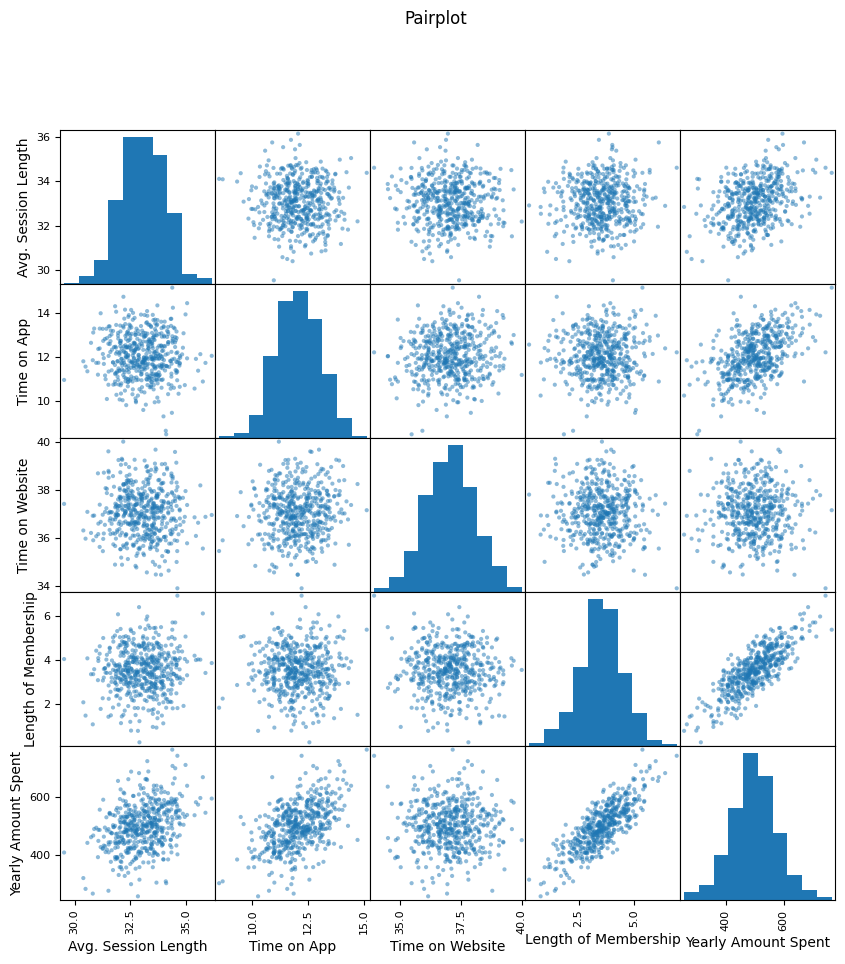

In [8]:
from pandas.plotting import scatter_matrix

numeric_df = df.select_dtypes(include=["float64", "int64"])

scatter_matrix(numeric_df, alpha=0.5, figsize=(10, 10), diagonal="hist")

plt.suptitle("Pairplot", y=1)
plt.show()

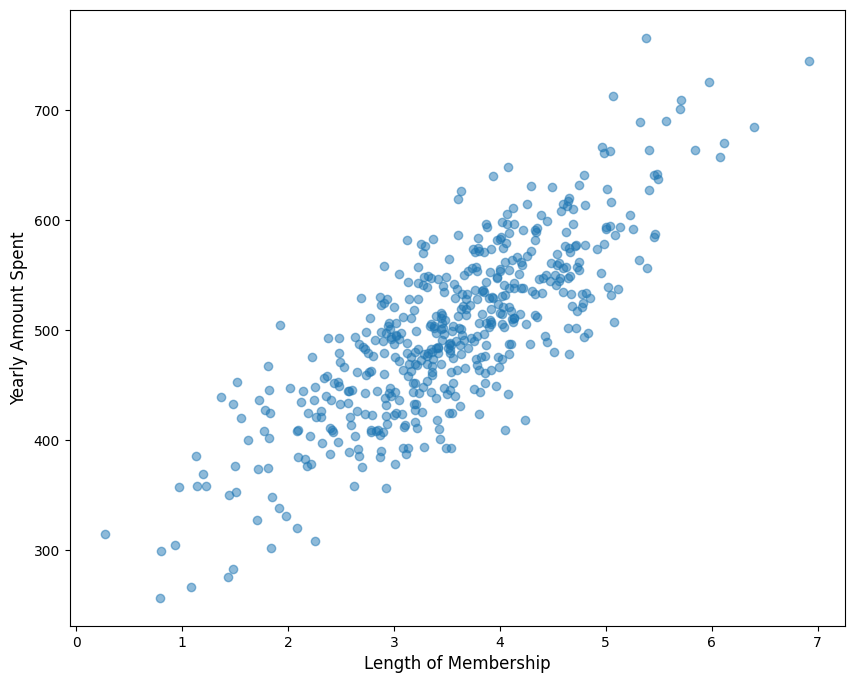

In [9]:
x = df["Length of Membership"]
y = df["Yearly Amount Spent"]

plt.figure(figsize=(10, 8))
plt.scatter(x, y, alpha=0.5)
plt.xlabel("Length of Membership", fontsize="12")
plt.ylabel("Yearly Amount Spent", fontsize="12", rotation=90)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[
    ["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]
]
y = df["Yearly Amount Spent"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [13]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
5,33.871038,12.026925,34.476878,5.493507
116,33.925795,12.011022,36.701052,2.753424
45,34.555768,12.170525,39.131097,3.663105
16,32.125387,11.733862,34.894093,3.136133
462,33.503810,11.233415,37.211153,2.320550
...,...,...,...,...
106,32.291756,12.190474,36.152462,3.781823
270,34.006489,12.956277,38.655095,3.275734
348,31.812483,10.886921,34.897828,3.128639
435,32.259973,14.132893,37.023479,3.762070


### Training a model


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lin_reg = LinearRegression()

In [16]:
lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
lin_reg.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

- This basically shows which factor is much related and important to the y="Yearly Amount Spent"


In [18]:
cdf = pd.DataFrame(lin_reg.coef_, X.columns, columns=["Coef"])
print(cdf)

                           Coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


In [ ]:
# predictions

predictions = lin_reg.predict(X_test)
print(predictions)  # predictions for y_test

[403.66993069 542.57756289 427.06591658 502.02460425 410.12143559
 569.93442508 531.93431341 506.29650969 408.71870658 473.97737105
 441.46912726 425.33703059 425.1297229  527.61676714 431.45684016
 424.0769184  575.76543296 484.89856554 458.35936863 481.96502182
 502.32441491 513.63783554 507.58877002 646.57464283 450.24372141
 496.27043415 556.40457807 554.95630839 399.64237199 325.84623136
 532.89783259 478.12238702 501.05701845 305.97335848 505.77244448
 483.79591969 518.8331528  438.18241857 456.71094234 471.04609461
 494.44008972 445.31155755 508.78802753 501.04594193 488.83499673
 535.38079541 595.20129802 514.04714872 280.76758312 433.10112367
 421.70823427 481.23640152 584.71372272 608.7748096  563.98513427
 494.72804869 394.52133407 456.4197529  573.08767515 499.6984241
 512.83277025 392.12434043 480.05057697 481.54520299 475.1117359
 546.2717533  430.85039085 602.16082001 422.3695128  493.57280186
 528.74970313 581.49002635 620.19139276 512.56880298 411.76623862
 498.4763749

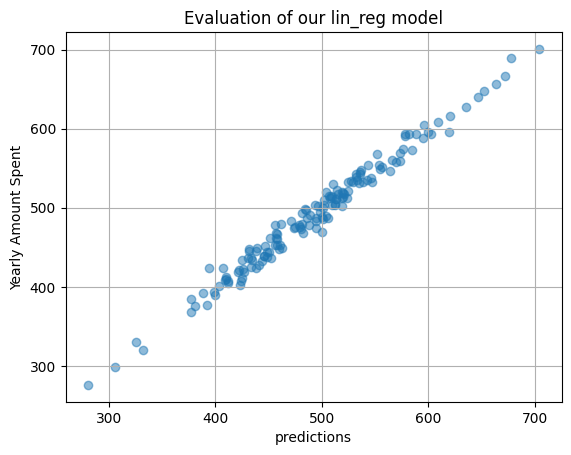

In [20]:
plt.scatter(predictions, y_test, alpha=0.5)
plt.xlabel("predictions")
plt.ylabel("Yearly Amount Spent", rotation=90)
plt.title("Evaluation of our lin_reg model")
plt.grid(True)
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [22]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))
print("MSE: ", mean_squared_error(y_test, predictions))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error:  8.426091641432025
MSE:  103.91554136503221
RMSE:  10.1938972608631


In [23]:
residuals = y_test - predictions
residuals

361    -2.636795
73     -7.800375
374    -8.463174
155     1.953775
104    -0.051825
         ...    
266    10.327176
23     15.027984
222   -16.778237
261    -6.021734
426    -4.371832
Name: Yearly Amount Spent, Length: 150, dtype: float64

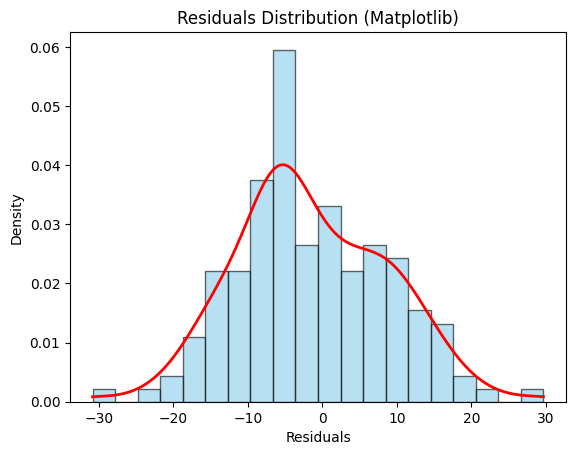

In [24]:
from scipy.stats import gaussian_kde

plt.hist(
    residuals, bins=20, density=True, alpha=0.6, color="skyblue", edgecolor="black"
)

kde = gaussian_kde(residuals)
x_vals = np.linspace(min(residuals), max(residuals), 500)
plt.plot(x_vals, kde(x_vals), color="red", linewidth=2)

plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Residuals Distribution (Matplotlib)")
plt.show()

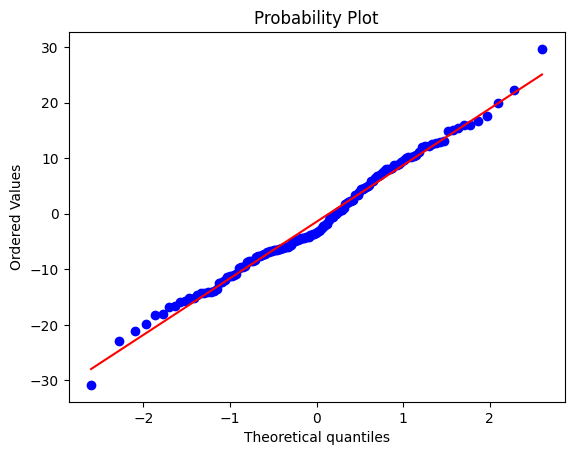

In [25]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()